In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("maaslar.csv")

In [4]:
df.head()

,Sene,Maas
0,10,8000
1,15,10000
2,5,7000
3,2,6500
4,0,5000


Text(0, 0.5, 'Maaş')

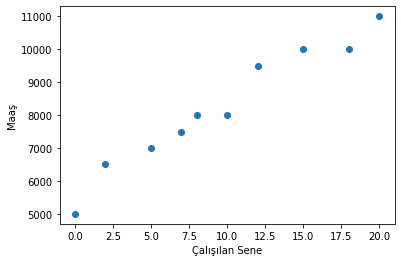

In [7]:
plt.scatter(df['Sene'],df['Maas'])
plt.xlabel('Çalışılan Sene')
plt.ylabel('Maaş')

In [8]:
import seaborn as sns

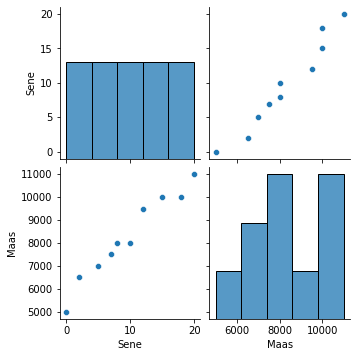

In [9]:
sns.pairplot(df)

## Linear Regression 

In [31]:
X = df[['Sene']] # df['Sene'] yanlış olur, doğrusu df[['Sene']]
y = df['Maas']

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression() # instantiate model object => model nesne oluştur

In [33]:
lm.fit(X, y) # model fit

LinearRegression()

In [34]:
lm

LinearRegression()

In [37]:
lm.predict([[9]]) # 9 yıllık bir çalışanın maaşı kaçtır? Modele göre

array([8057.72646536])

In [39]:
lm.predict([[8]]) 

array([7783.04998731])

In [40]:
# Başka bir veri seti

In [41]:
df2 = pd.read_csv("maaslar2.csv")

In [42]:
df2.head()

,Sene,Egitim,Maas
0,10,1,8000
1,15,2,10000
2,5,3,7000
3,2,2,6500
4,0,1,5000


In [55]:
X = df2[['Sene','Egitim']] # df['Sene'] yanlış olur, doğrusu df[['Sene']]
y = df2['Maas']

In [56]:
lm2 = LinearRegression() # instantiate model object => model nesne oluştur

In [57]:
lm2.fit(X,y)

LinearRegression()

In [58]:
X

,Sene,Egitim
0,10,1
1,15,2
2,5,3
3,2,2
4,0,1
5,20,2
6,8,3
7,7,1
8,12,2
9,18,3


In [61]:
lm2.predict([[9,1]])

array([7941.73660426])

## Regression: Model sayısal bir tahmin eder
## Sınıflandırma: Model bir sınıflandırma tahmini yapar (spam/değil, reklama klik/pass) => Classification

## Titanic veri seti

In [62]:
df = pd.read_csv('../data/titanic_train.csv')

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

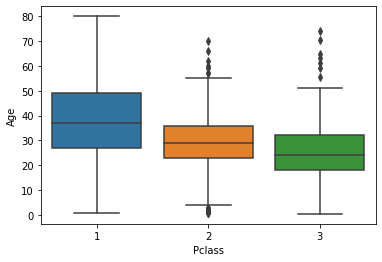

In [67]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [70]:
def pclass_ile_yas_tahmin(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    return Age

In [71]:
df['Age'] = df[['Age','Pclass']].apply(pclass_ile_yas_tahmin, axis=1)

In [72]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
df.drop('Cabin', axis=1, inplace=True)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [76]:
df.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)

In [77]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [80]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [81]:
df = pd.concat([df,sex], axis=1)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,1


In [83]:
df.drop(['Sex'],inplace=True, axis=1)

In [84]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 49.7 KB


In [86]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [87]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,1,3,22.0,1,0,7.2500,1
1,2,1,38.0,1,0,71.2833,0
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,0
4,5,3,35.0,0,0,8.0500,1


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [89]:
X_train.shape

(623, 7)

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
logmodel = LogisticRegression()

In [92]:
logmodel.fit(X_train, y_train)

c:\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
tahminler = logmodel.predict(X_test)

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test, tahminler))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.78      0.69      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [97]:
# https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
# Precision vs Recall hakkında bilgi linki

## Scaling

In [98]:
# Değişkenlerin değerleri arasındaki farkların büyük olması modeli etkiler. Bu nedenle değişkenler üzerinde bir ölçeklendirme gereklidir.

In [99]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler().fit(X_train)

In [102]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
584,585,3,24.0,0,0,8.7125,1
351,352,1,37.0,0,0,35.0000,1
468,469,3,24.0,0,0,7.7250,1
323,324,2,22.0,1,1,29.0000,0
189,190,3,36.0,0,0,7.8958,1


In [103]:
X_train_scaled = scaler.transform(X_train)

In [105]:
X_train_scaled

array([[ 0.50410716,  0.79547906, -0.38979445, ..., -0.4726227 ,
        -0.43330296,  0.70540496],
       [-0.39728222, -1.65790438,  0.61592241, ..., -0.4726227 ,
         0.07106994,  0.70540496],
       [ 0.05534678,  0.79547906, -0.38979445, ..., -0.4726227 ,
        -0.45224992,  0.70540496],
       ...,
       [ 1.58732187, -0.43121266, -0.38979445, ..., -0.4726227 ,
        -0.35103957,  0.70540496],
       [-0.04523744,  0.79547906, -0.31243161, ..., -0.4726227 ,
        -0.45129058,  0.70540496],
       [-0.45144296, -1.65790438,  0.92537375, ..., -0.4726227 ,
         1.98015617, -1.41762542]])

In [106]:
logmodel2 = LogisticRegression() # yeni bir logistic model

In [108]:
logmodel2.fit(X_train_scaled, y_train)

LogisticRegression()

In [112]:
tahminler2 = logmodel2.predict(scaler.transform(X_test))

In [110]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
422,423,3,29.0,0,0,7.8750,1
789,790,1,46.0,0,0,79.2000,1
722,723,2,34.0,0,0,13.0000,1
49,50,3,18.0,1,0,17.8000,0
52,53,1,49.0,1,0,76.7292,0


In [114]:
print("Ölçeklendirme ile oluşturulan model performansı")
print(classification_report(y_test, tahminler2))

Ölçeklendirme ile oluşturulan model performansı
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       153
           1       0.77      0.76      0.76       115

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [115]:
print("Ölçeklendirme yapılmadan oluşturulan model performansı")
print(classification_report(y_test, tahminler))

Ölçeklendirme yapılmadan oluşturulan model performansı
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.78      0.69      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268

